In [1]:
 !pip install seaborn
 !pip install scikit-learn
 !xgboost

 from sklearn.preprocessing import StandardScaler, OneHotEncoder
 from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
 import matplotlib.pyplot as plt
 import numpy as np
 from pathlib import Path
 import pandas as pd
 import tarfile
 from sklearn.model_selection import train_test_split,GridSearchCV
 import seaborn as sb
 import urllib.request
 from pandas.plotting import scatter_matrix
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 from sklearn.compose import ColumnTransformer
 from sklearn.linear_model import LinearRegression
 from sklearn.linear_model import LogisticRegression
 from sklearn.svm import SVC
 from xgboost import XGBClassifier

'xgboost' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
 def load_predict_data():
    tarball_path = Path("datasets/ML.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/mayAnalyst/SSRefah/refs/heads/main/ML.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as predict_tarball:
            predict_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/ML.tgz"))
predict = load_predict_data()


df = pd.DataFrame(predict)



In [3]:
predict.head()



,company,Year,NetProfit,CurrencyBalance,Salary
0,refah,2015-12-29,46785,4698,2731
1,refah,2016-12-29,3815,6631,3214
2,refah,2017-12-29,99663,237525,5108
3,refah,2018-12-29,134782,13687,7279
4,refah,2019-12-29,472089,23625,10608


In [4]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          10 non-null     object
 1   Year             10 non-null     object
 2   NetProfit        10 non-null     int64 
 3   CurrencyBalance  10 non-null     int64 
 4   Salary           10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


In [5]:
predict.describe()

,NetProfit,CurrencyBalance,Salary
count,1.000000e+01,1.000000e+01,10.000000
mean,8.576974e+05,1.413431e+06,27566.100000
std,7.799989e+05,2.102190e+06,35506.173634
min,3.815000e+03,4.698000e+03,2731.000000
25%,1.084428e+05,1.575375e+04,5650.750000
50%,8.636045e+05,1.305750e+05,13686.000000
75%,1.495891e+06,2.141850e+06,28443.750000
max,2.041277e+06,6.315829e+06,114902.000000


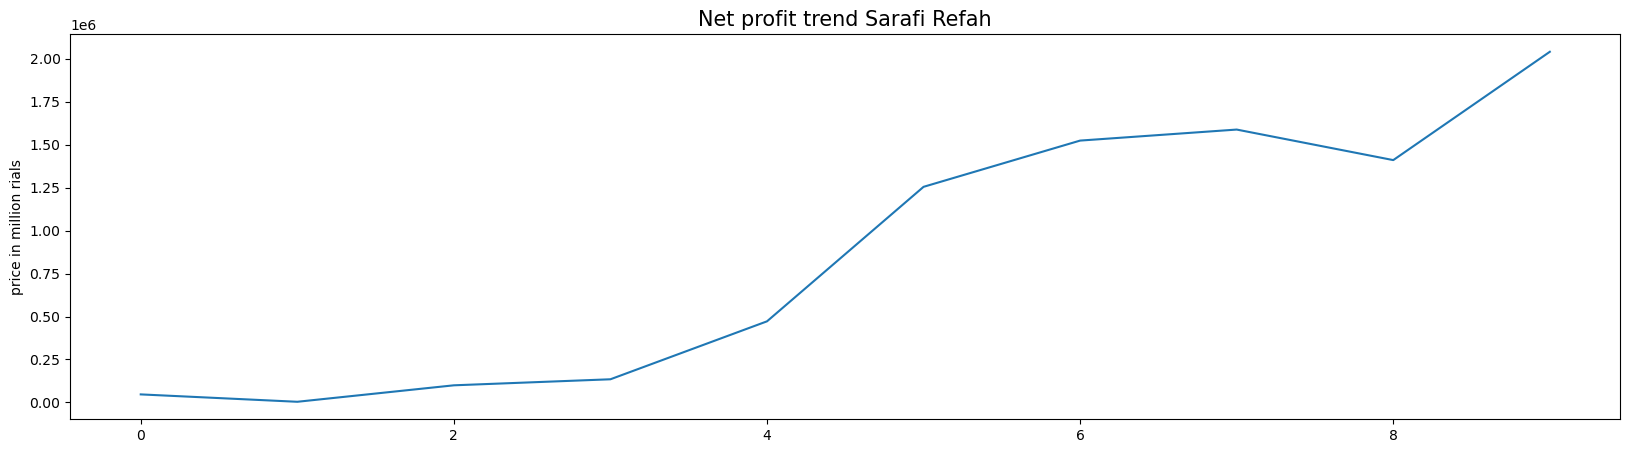

In [6]:
plt.figure(figsize=(20,5))
plt.plot(predict['NetProfit'])
plt.title('Net profit trend Sarafi Refah', fontsize=15)
plt.ylabel('price in million rials')
plt.show()

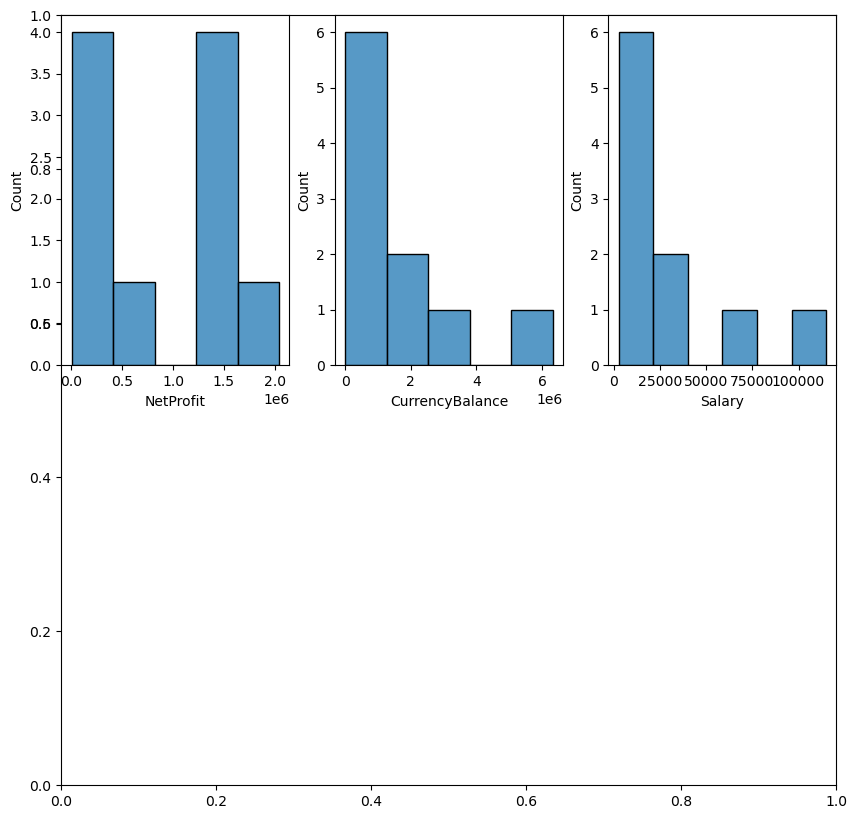

In [7]:
features = ['NetProfit', 'CurrencyBalance', 'Salary']

plt.subplots(figsize=(10,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(predict[col])
plt.show()

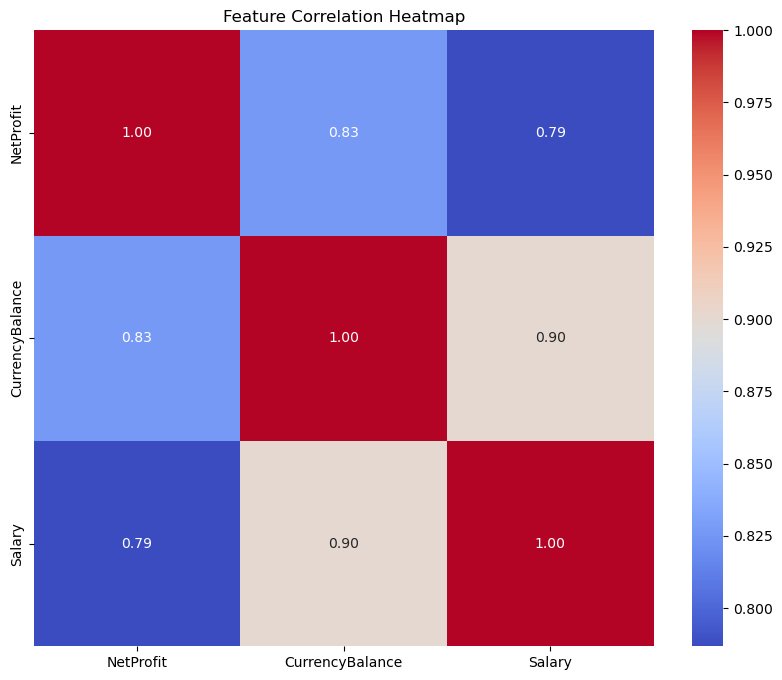

In [8]:
numerics = predict.select_dtypes(include=[np.number]).columns
predict[numerics] = predict[numerics].fillna(predict[numerics].mean())

plt.figure(figsize=(10, 8))
sb.heatmap(predict[numerics].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
splitted = df['Year'].str.split('-', expand=True)

df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,company,Year,NetProfit,CurrencyBalance,Salary,month,year,day
0,refah,2015-12-29,46785,4698,2731,12,2015,29
1,refah,2016-12-29,3815,6631,3214,12,2016,29
2,refah,2017-12-29,99663,237525,5108,12,2017,29
3,refah,2018-12-29,134782,13687,7279,12,2018,29
4,refah,2019-12-29,472089,23625,10608,12,2019,29


In [10]:
df['is_quarter_end'] = np.where(df['year']%3==0,1,0)
df.head()

,company,Year,NetProfit,CurrencyBalance,Salary,month,year,day,is_quarter_end
0,refah,2015-12-29,46785,4698,2731,12,2015,29,0
1,refah,2016-12-29,3815,6631,3214,12,2016,29,1
2,refah,2017-12-29,99663,237525,5108,12,2017,29,0
3,refah,2018-12-29,134782,13687,7279,12,2018,29,0
4,refah,2019-12-29,472089,23625,10608,12,2019,29,1


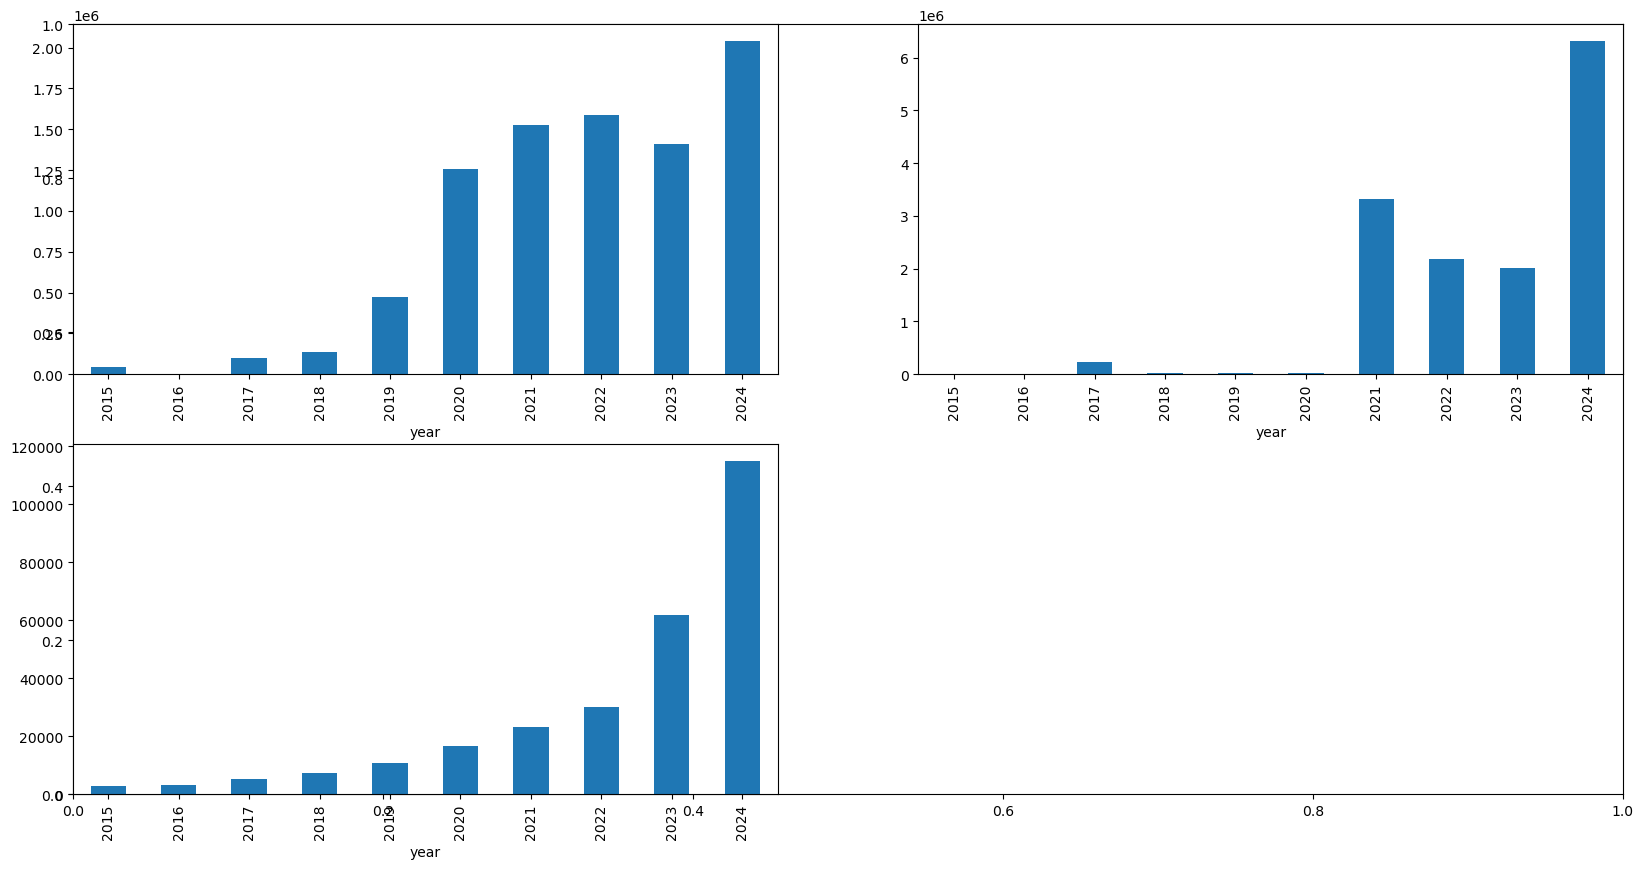

In [11]:
data_grouped = df.drop('Year', axis=1).groupby('year').mean(numeric_only = True)
plt.subplots(figsize=(20,10))

for i, col in enumerate(['NetProfit', 'CurrencyBalance', 'Salary']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [12]:
df.drop('Year', axis=1).groupby('is_quarter_end').mean(numeric_only = True)

,NetProfit,CurrencyBalance,Salary,month,year,day
is_quarter_end,,,,,,
0,930371.571429,1.702629e+06,33092.428571,12.0,2019.714286,29.0
1,688124.333333,7.386353e+05,14671.333333,12.0,2019.000000,29.0


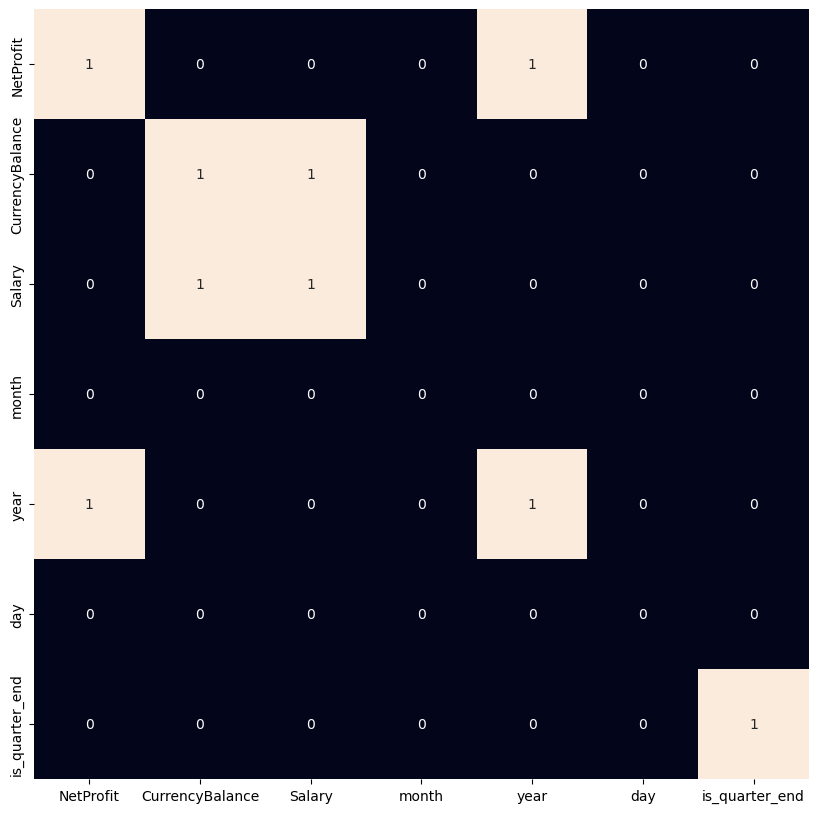

In [13]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Year', axis=1).corr(numeric_only = True) > 0.9, annot=True, cbar=False)
plt.show()

In [26]:
df['CurrencyBalance']  = df['CurrencyBalance']
df['NetProfit']  = df['NetProfit']
df['target'] = np.where(df['year'].shift(-1) > 2034, 1, 0)

features = df[['NetProfit', 'CurrencyBalance', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)
print(Y_train.shape, Y_valid.shape)

(9, 3) (1, 3)
(9,) (1,)


In [28]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'coef_'